Loading MNIST dataset...


/its/home/ag918/.local/lib/python3.8/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


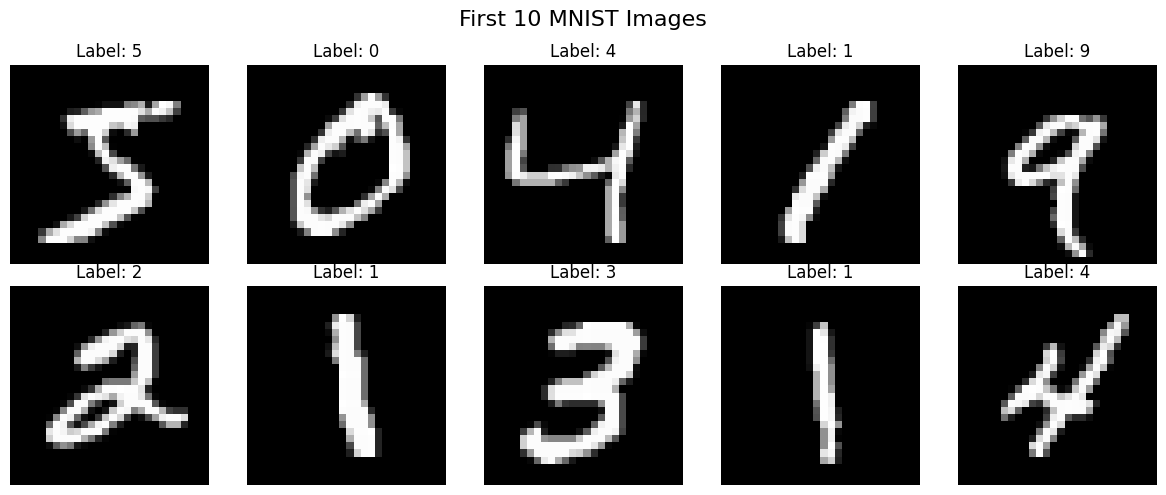

In [3]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import numpy as np

# Load MNIST data
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1, as_frame=False, cache=True)
X, y = mnist.data, mnist.target.astype(int)

# Reshape the data
X = X.reshape(-1, 28, 28)

# Create a figure with 10 subplots
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
fig.suptitle("First 10 MNIST Images", fontsize=16)

# Flatten the axes array
axes = axes.flatten()

# Display the first 10 images
for i in range(10):
    # Plot the image
    axes[i].imshow(X[i], cmap='gray')
    axes[i].axis('off')  # Turn off axis numbers
    
    # Set the title to the corresponding label
    axes[i].set_title(f"Label: {y[i]}", fontsize=12)

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

Here we do Normalisation(Scale pixel values from [0, 255] to [0, 1]) 

Reshaping - Reshape images to (28, 28, 1)

Label encoding - Convert numeric labels to one-hot encoded vectors

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import numpy as np 

# Load MNIST data
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1, as_frame=False, cache=True)
X, y = mnist.data, mnist.target.astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 1: Normalisation
# Scale pixel values from [0, 255] to [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

print("Normalization complete.")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

# Step 2: Reshaping
# Reshape images to (28, 28, 1)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

print("Reshaping complete.")
print("X_train shape after reshaping:", X_train.shape)
print("X_test shape after reshaping:", X_test.shape)

# Step 3: Label encoding
# Convert numeric labels to one-hot encoded vectors
y_train = to_categorical(y_train, 10)  # 10 is the number of classes (digits 0-9)
y_test = to_categorical(y_test, 10)

print("Label encoding complete.")
print("y_train shape after encoding:", y_train.shape)
print("y_test shape after encoding:", y_test.shape)

# Print sample to verify
print("\nSample normalized and reshaped image (first 5x5 pixels):")
print(X_train[0, :5, :5, 0])
print("\nCorresponding one-hot encoded label:")
print(y_train[0])

# Optional: Save preprocessed data
np.save('X_train_preprocessed.npy', X_train)
np.save('X_test_preprocessed.npy', X_test)
np.save('y_train_preprocessed.npy', y_train)
np.save('y_test_preprocessed.npy', y_test)
print("\nPreprocessed data saved to .npy files.")